In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from darwin.config import (
    MODELS_DIR,
    PROCESSED_DATA_DIR,
    SCORES_DIR,
    RANDOM_STATE,
    METRICS,
    RANDOM_SEEDS
)

2025-03-28 14:03:04.447 | INFO     | darwin.config:<module>:11 - PROJ_ROOT path is: /Users/eduardoduarte/Projects/refactor-darwin/darwin


In [2]:
preprocessed_scores = pd.read_csv(f"{SCORES_DIR}/preprocessed_score.csv")
feature_imp_scores = pd.read_csv(f"{SCORES_DIR}/feature_imp_score.csv")
anvoa_scores = pd.read_csv(f"{SCORES_DIR}/anova_score.csv")
rfe_scores = pd.read_csv(f"{SCORES_DIR}/rfe_score.csv")

In [3]:
rfe_scores.head()

,Unnamed: 0,Unnamed: 1,accuracy,precision,recall,f1
0,tree,454,0.747227,0.777671,0.724681,0.745762
1,tree,167,0.753613,0.745105,0.783302,0.761625
2,tree,332,0.781008,0.828959,0.729219,0.768081
3,tree,322,0.775126,0.798935,0.762281,0.775967
4,tree,222,0.764034,0.780028,0.767941,0.768889


### Changing the Unnamed column names

In [4]:
for df in [
    preprocessed_scores,
    feature_imp_scores,
    anvoa_scores,
    rfe_scores
]:
    df.rename(columns={"Unnamed: 0": "model", "Unnamed: 1": "seed"}, inplace=True)
    df.drop(columns=["seed"], inplace=True)

In [5]:
rfe_scores.head()

,model,accuracy,precision,recall,f1
0,tree,0.747227,0.777671,0.724681,0.745762
1,tree,0.753613,0.745105,0.783302,0.761625
2,tree,0.781008,0.828959,0.729219,0.768081
3,tree,0.775126,0.798935,0.762281,0.775967
4,tree,0.764034,0.780028,0.767941,0.768889


/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


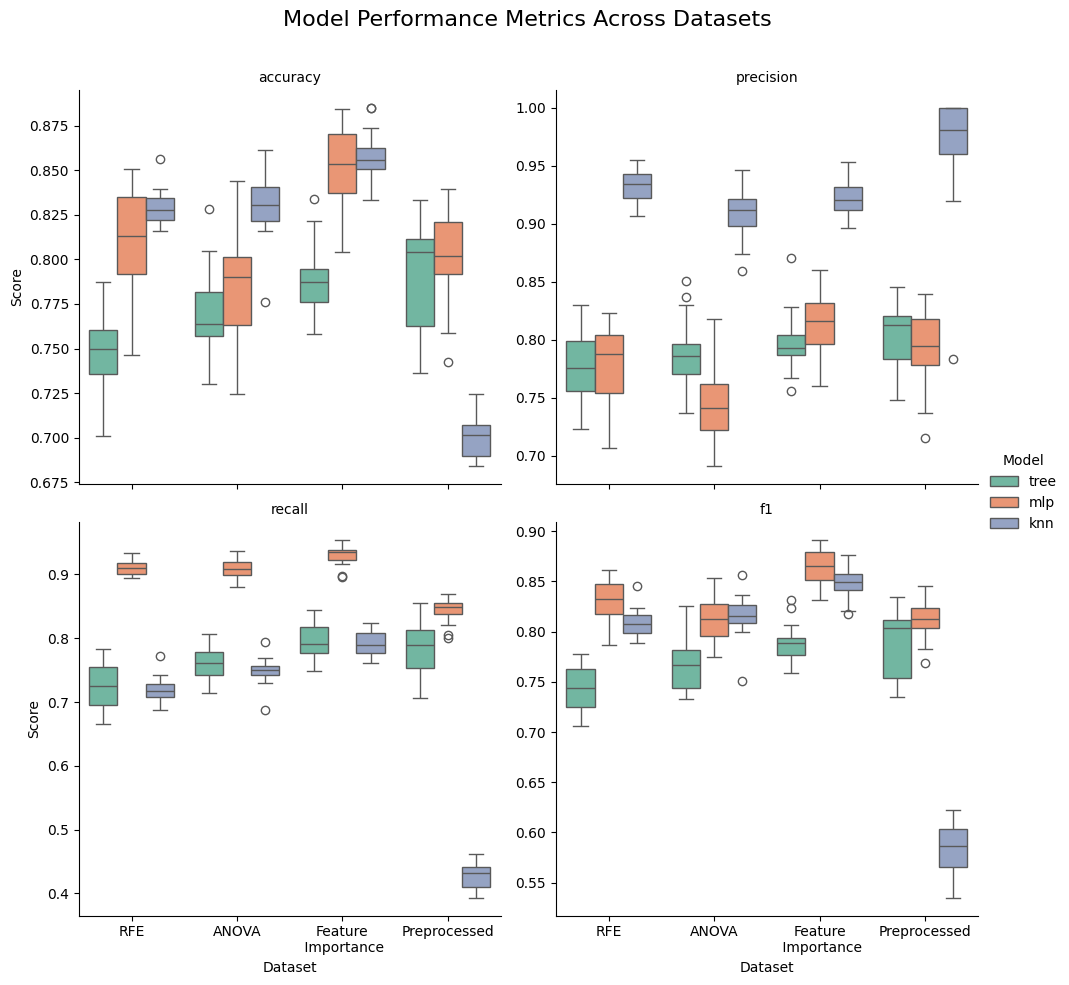

In [12]:
def plot_facet_grid(all_scores):
    # Ensure the DataFrame is in long format
    # Assuming columns: 'model', 'metric', 'value', and 'dataset'
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Create a FacetGrid for the metrics
    g = sns.FacetGrid(all_scores, col="metric", col_wrap=2, height=5, sharey=False)
    g.map(sns.boxplot, "dataset", "value", "model", order=None, palette="Set2")
    g.add_legend(title="Model")

    # Customize the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Dataset", "Score")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Model Performance Metrics Across Datasets", fontsize=16)

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature\n Importance'
preprocessed_scores['dataset'] = 'Preprocessed'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, preprocessed_scores])

# Call the function to plot Facet Grids
plot_facet_grid(all_scores)

/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


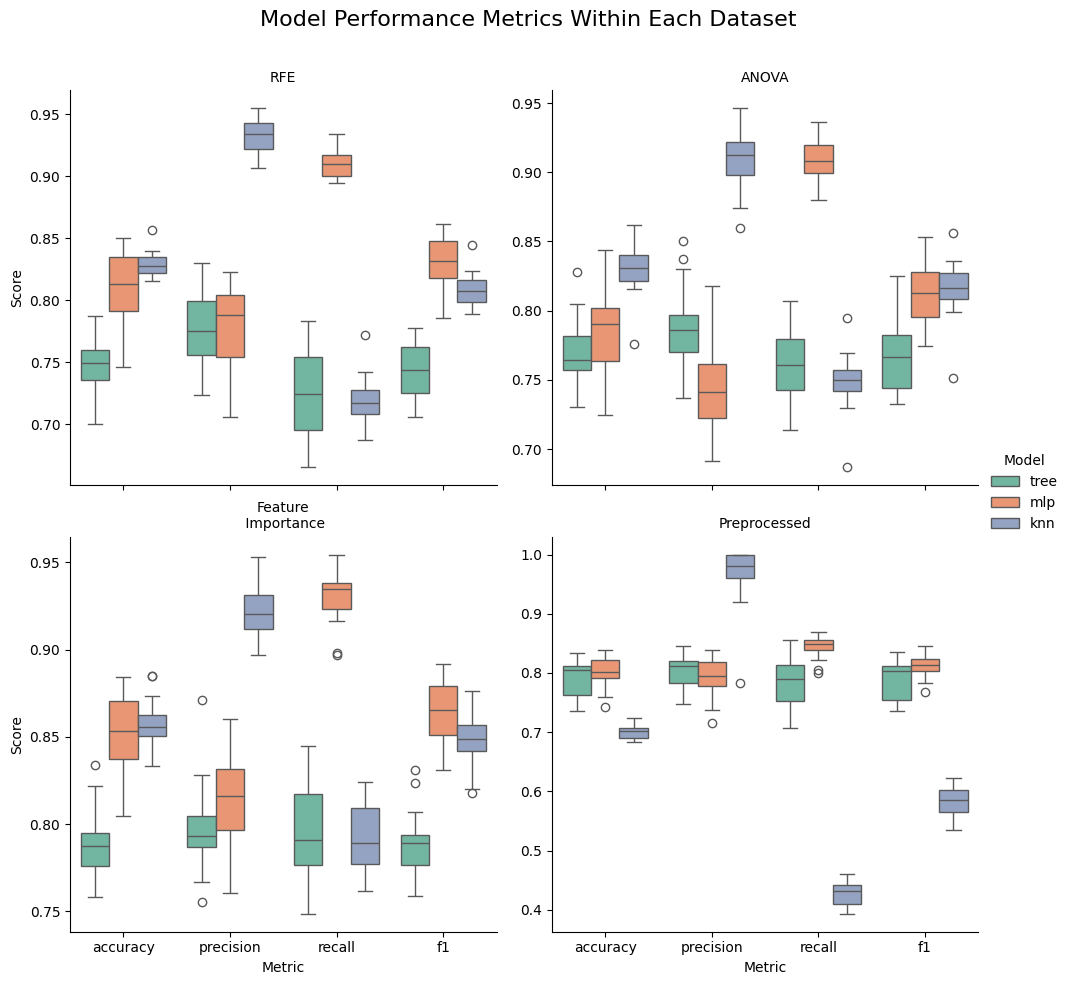

In [13]:
def plot_facet_grid_by_dataset(all_scores):
    # Ensure the DataFrame is in long format
    # Assuming columns: 'model', 'metric', 'value', and 'dataset'
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Create a FacetGrid for the datasets
    g = sns.FacetGrid(all_scores, col="dataset", col_wrap=2, height=5, sharey=False)
    g.map(sns.boxplot, "metric", "value", "model", order=None, palette="Set2")
    g.add_legend(title="Model")

    # Customize the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Metric", "Score")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Model Performance Metrics Within Each Dataset", fontsize=16)

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature\n Importance'
preprocessed_scores['dataset'] = 'Preprocessed'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, preprocessed_scores])

# Call the function to plot Facet Grids by dataset
plot_facet_grid_by_dataset(all_scores)

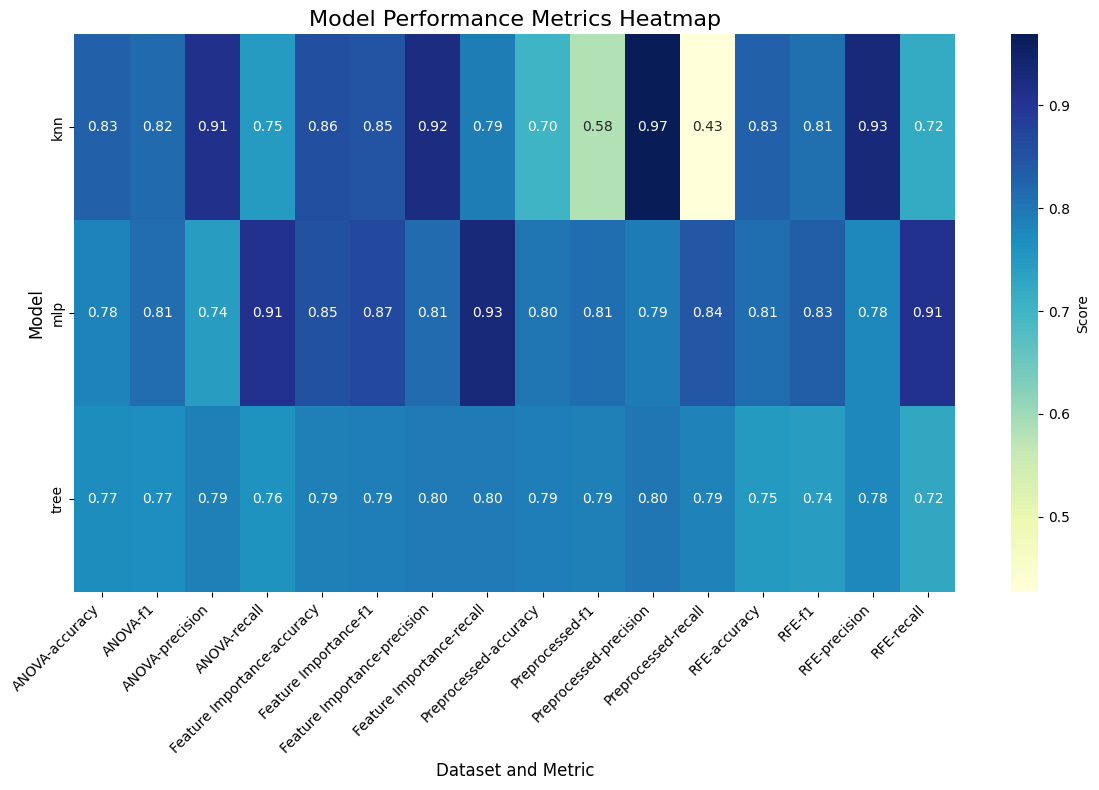

In [15]:
def plot_heatmap(all_scores):
    # Ensure the DataFrame is in long format
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = all_scores.pivot_table(index='model', columns=['dataset', 'metric'], values='value', aggfunc='mean')

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Score'})

    # Customize the plot
    plt.title("Model Performance Metrics Heatmap", fontsize=16)
    plt.xlabel("Dataset and Metric", fontsize=12)
    plt.ylabel("Model", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature Importance'
preprocessed_scores['dataset'] = 'Preprocessed'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, preprocessed_scores])

# Call the function to plot the heatmap
plot_heatmap(all_scores)

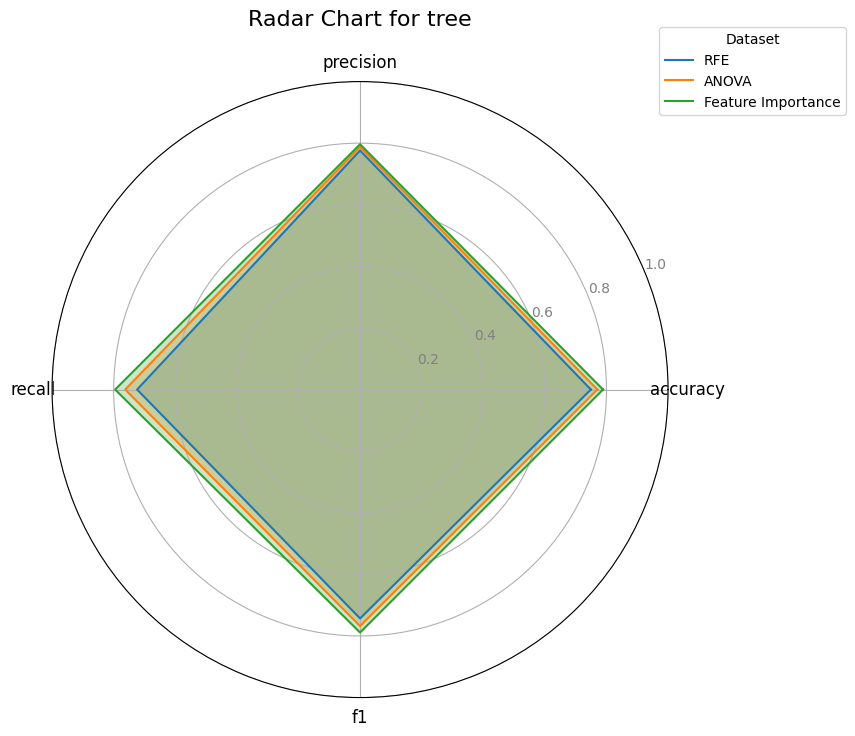

In [9]:
def plot_radar_chart(all_scores, model_name):
    # Ensure the DataFrame is in long format
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Filter data for the selected model
    model_scores = all_scores[all_scores['model'] == model_name]

    # Prepare data for the radar chart
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    datasets = model_scores['dataset'].unique()
    num_vars = len(metrics)

    # Create the radar chart for each dataset
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    for dataset in datasets:
        dataset_scores = model_scores[model_scores['dataset'] == dataset]
        values = dataset_scores.groupby('metric')['value'].mean().reindex(metrics).values
        values = np.append(values, values[0])  # Close the circle
        ax.plot(angles, values, label=dataset)
        ax.fill(angles, values, alpha=0.25)

    # Customize the radar chart
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color="grey", size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=12)
    ax.set_title(f"Radar Chart for {model_name}", size=16, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title="Dataset")

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature Importance'
preprocessed_scores['dataset'] = 'Preprocessed'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, preprocessed_scores])
all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores])

# Call the function to plot a radar chart for a specific model
plot_radar_chart(all_scores, model_name="tree")  # Replace "tree" with the desired model name

### Compare model performance in the same dataset

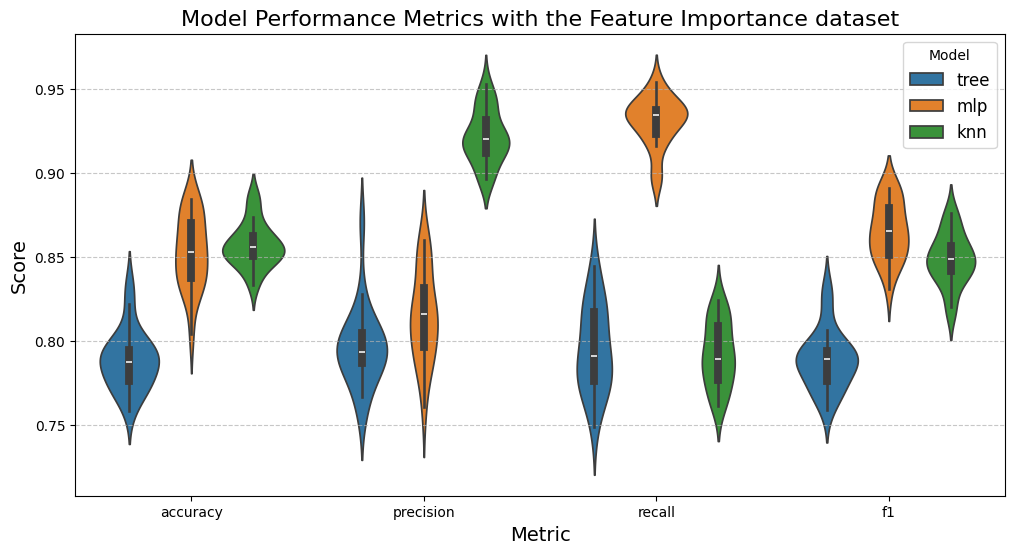

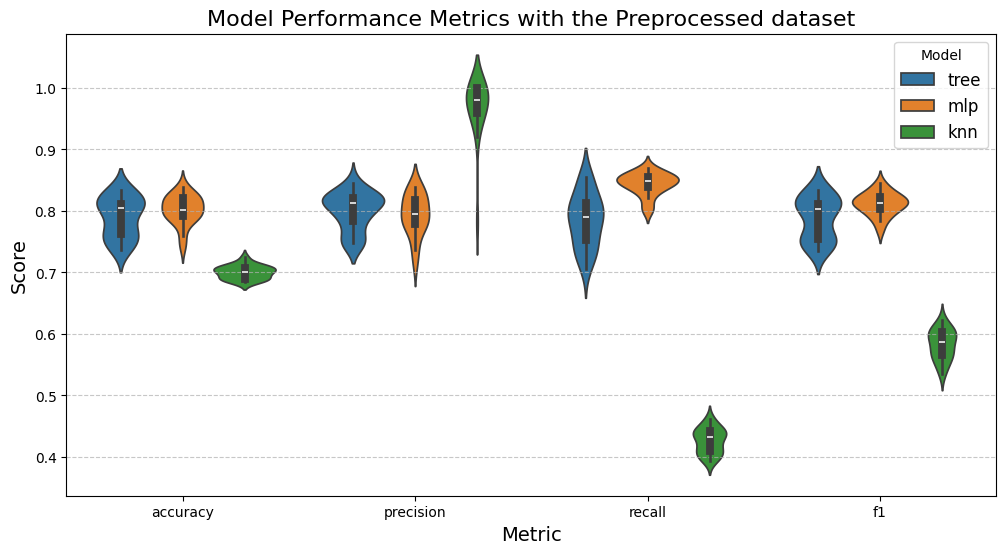

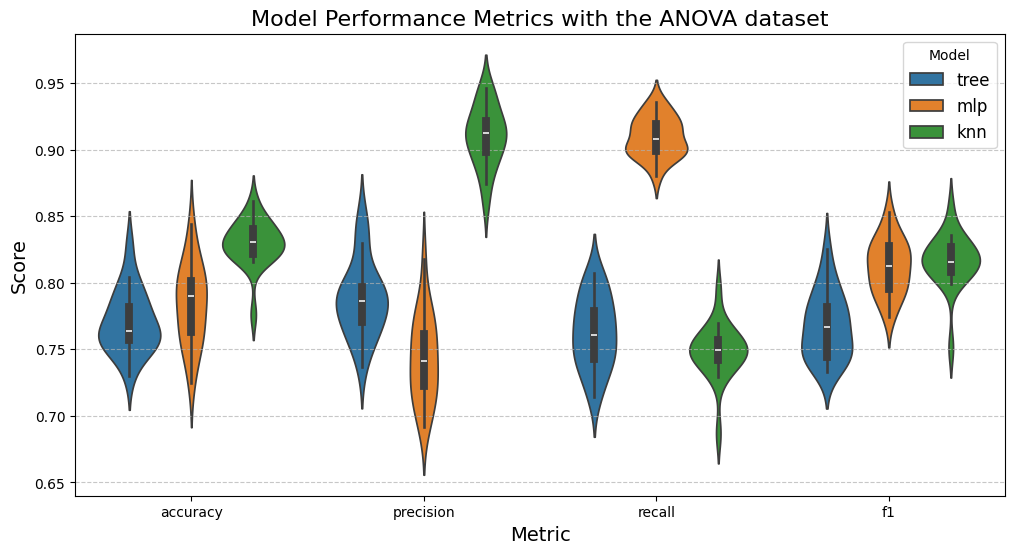

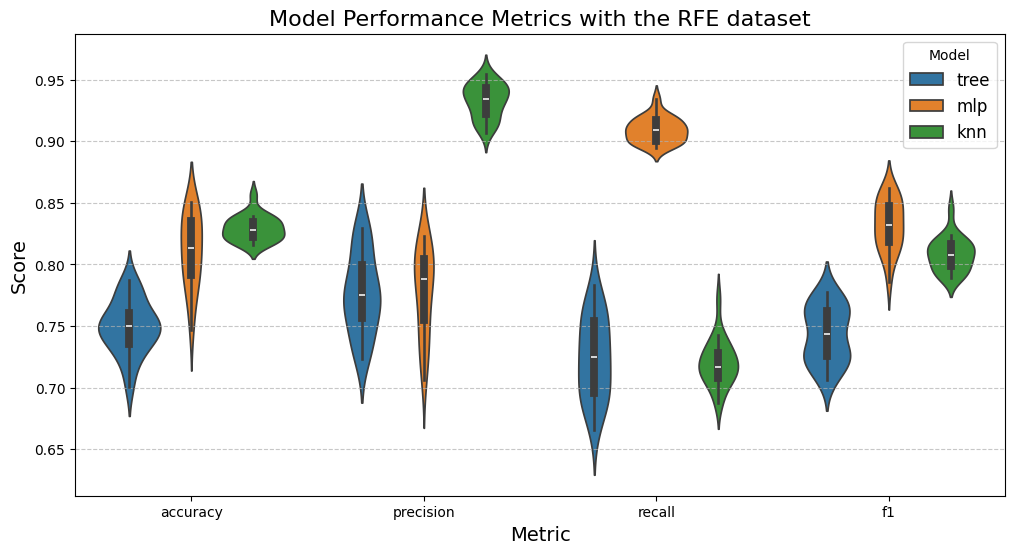

In [10]:
def plot_boxplot_scores(df, model):
    df_plot = df.melt(id_vars=['model'], 
                                value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                var_name='metric', 
                                value_name='value')

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df_plot, x='metric', y='value', hue='model')

    # Customize the plot
    plt.title(f'Model Performance Metrics with the {model} dataset', fontsize=16)
    plt.xlabel('Metric', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(title='Model', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

plot_boxplot_scores(feature_imp_scores, "Feature Importance")
plot_boxplot_scores(preprocessed_scores, "Preprocessed")
plot_boxplot_scores(anvoa_scores, "ANOVA")
plot_boxplot_scores(rfe_scores, "RFE")

### Camparing datasets from model performance

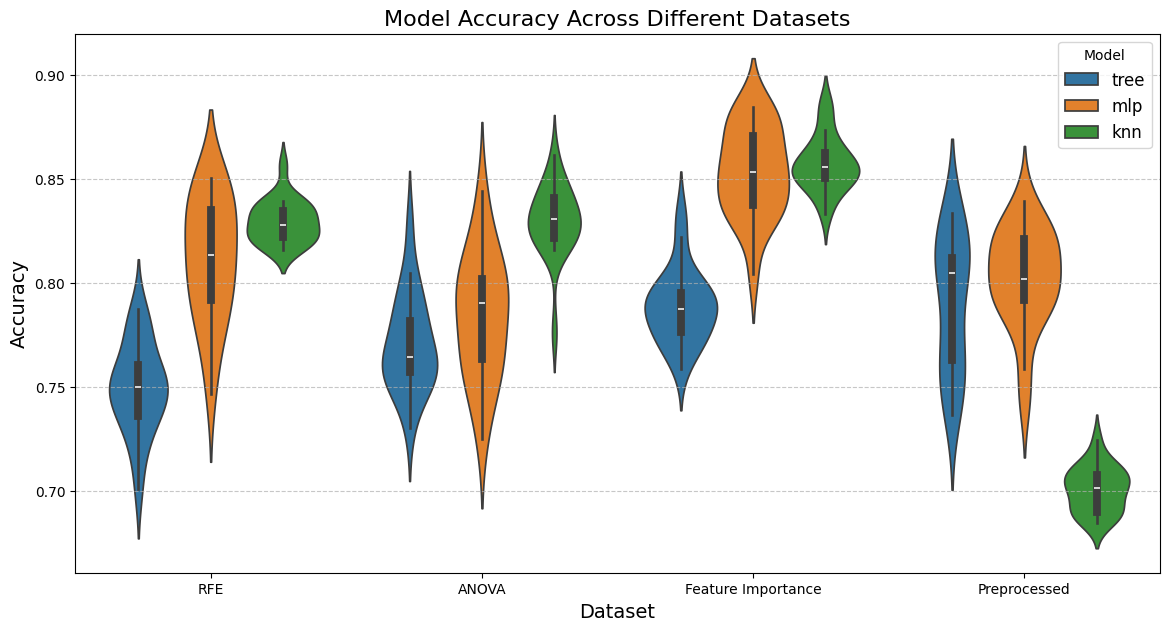

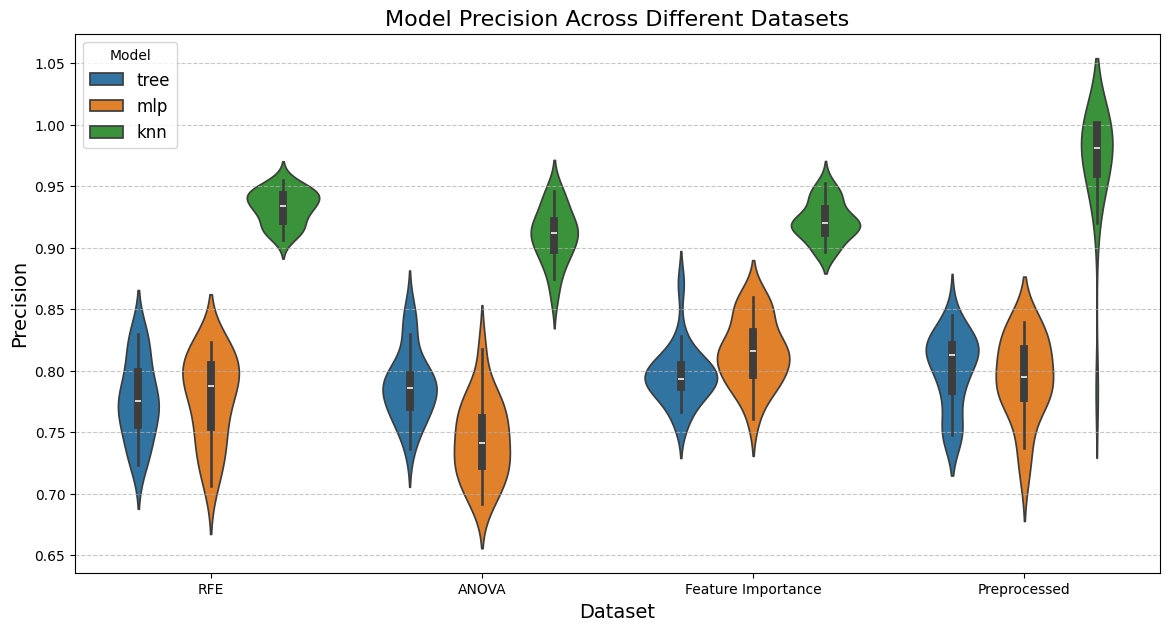

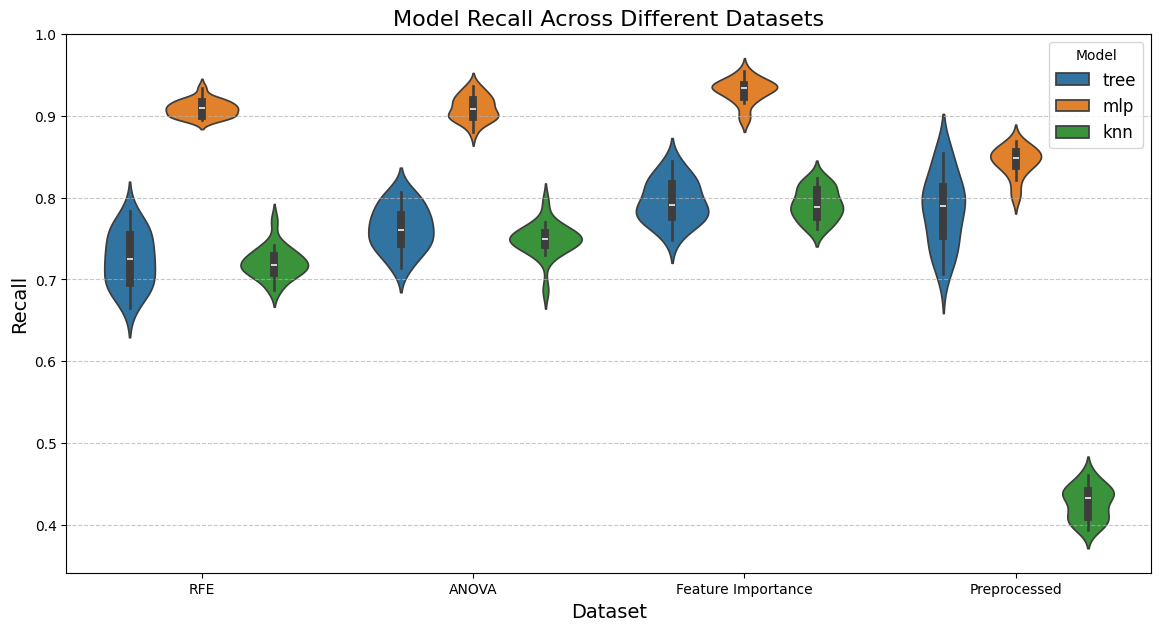

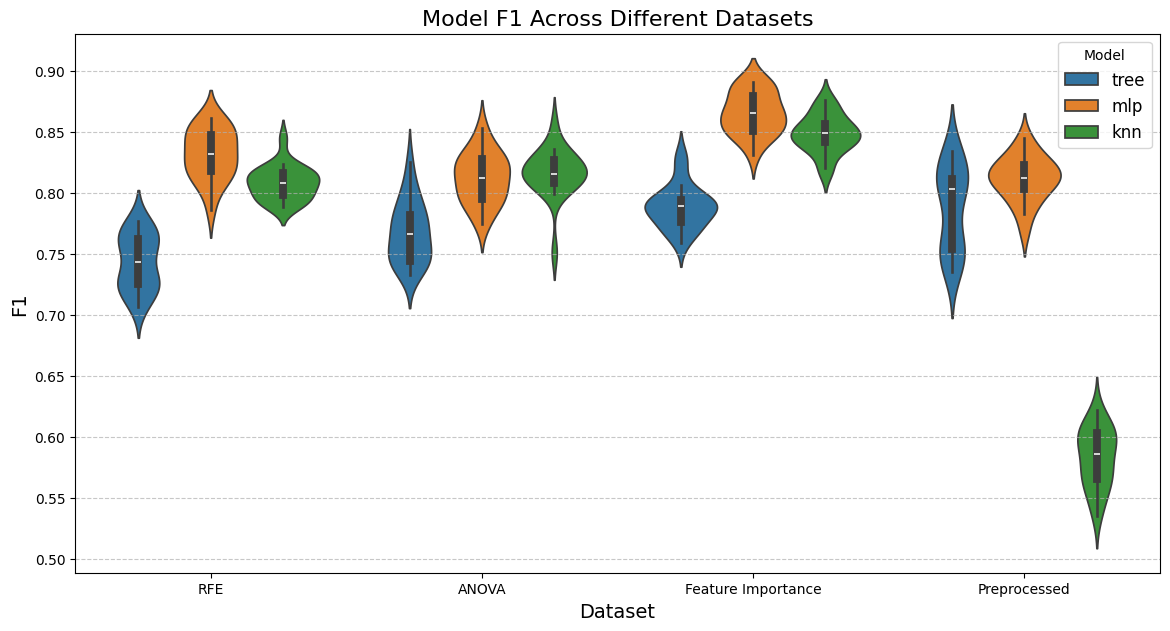

In [11]:
def plot_violin_by_selection(metric):
    # Add a column to each DataFrame to indicate the dataset source
    rfe_scores['dataset'] = 'RFE'
    anvoa_scores['dataset'] = 'ANOVA'
    feature_imp_scores['dataset'] = 'Feature Importance'
    preprocessed_scores['dataset'] = 'Preprocessed'

    # Combine all datasets into a single DataFrame
    all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, preprocessed_scores])
    # all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores])

    # Ensure the DataFrame is in long format
    # Assuming columns: 'model', 'metric', 'value', and 'dataset'
    # Uncomment the following lines if your DataFrame is in wide format
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                var_name='metric', 
                                value_name='value')

    # Filter for a specific metric, e.g., accuracy
    metric_scores = all_scores[all_scores['metric'] == metric]

    # Create the violin plot for the selected metric
    plt.figure(figsize=(14, 7))
    sns.violinplot(data=metric_scores, x='dataset', y='value', hue='model', split=False)

    # Customize the plot
    plt.title(f'Model {metric.capitalize()} Across Different Datasets', fontsize=16)
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.legend(title='Model', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plot_violin_by_selection("accuracy")
plot_violin_by_selection("precision")
plot_violin_by_selection("recall")
plot_violin_by_selection("f1")